# LASSO REGRESSION
- Amaç, hata kareler toplamını(SSE) minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır.
- Lasso regression için L1 yöntemi denir.

 **Özellikler**
- Ridge regresyonun ilgili-ilgisiz tüm değişkenleri modelde bırakma dezavantajını gidermek için önerilmiştir.
- Lasso da katsayılar sıfıra yaklaştırılır.
- CV (Cross-Validation) kullanılır.
- Ridge ve Lasso yöntemleri biribirinden üstün değildir.

**Gerekli Kütüphaneler**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import model_selection


**Veri Seti**

In [5]:
df = pd.read_csv("./Hitters.csv")
# bu csv dosyasının içerisinde eksik gözlemleri(NA) çıkardık.
df = df.dropna()

dms = pd.get_dummies(df[["League","Division","NewLeague"]])

# bağımlı değişken
y = df[["Salary"]]

# burada yazdığımız verileri uçurduk drop ile
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")

# dms ile X_ birleştirip(concat) bağımsız değişken oluşturduk.
X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state= 42) 

In [6]:
df.shape

(263, 20)

In [7]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


**Model Oluşturma** 

In [11]:
lassoModel = Lasso().fit(X_train,y_train)

C:\Users\halil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850385, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


In [19]:
lassoModel

Lasso()

In [20]:
# Sabit Katsayı
lassoModel.intercept_

array([-5.58745068])

In [21]:
# bağımsız değişken katsayıları
lassoModel.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

**Farklı lambda değerlerine karşılık katsayılar**

In [50]:
lasso = Lasso()
coefs = []

# alphas = np.random.randint(0,100000,10)

# katsayı seti
alphas = 10**np.linspace(10,-2,100)*0.5

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)

C:\Users\halil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741401881, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\halil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679608315, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\halil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.756137549877, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\halil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarnin

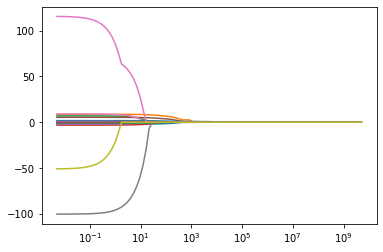

In [51]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")



**Tahmin**

In [52]:
lassoModel

Lasso()

In [53]:
lassoModel.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [58]:
lassoModel.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [60]:
# test hatası = X_text seti içerisindeki bağımsız değişkenleri kullanarak X_test seti içerisindeki bağımlı değişkenlerin değerini tahmin edecez.
y_pred = lassoModel.predict(X_test)   

In [8]:
# MSE = hata kareler ortalaması
MSE = np.sqrt(mean_squared_error(y_test,y_pred))
MSE

NameError: name 'y_pred' is not defined

In [9]:
# r2_socre = bağımsız değişkenlerce bağımlı değişkendeki değişikliğin açıklanma yüzdesidir. 
r2_score(y_test,y_pred)

NameError: name 'y_pred' is not defined

**Model Tunning**

In [78]:
# katsayı seti
alphas = 10**np.linspace(10,-2,100)*0.5

In [79]:
lasso_cv_model = LassoCV(alphas = alphas,cv=10,max_iter=100000).fit(X_train,y_train)

C:\Users\halil\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [80]:
lasso_cv_model.alpha_

201.85086292982749

In [81]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train,y_train)
# diğer bir aynı yöntem ise;
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(X_train,y_train)

In [82]:
# test hatası = X_text seti içerisindeki bağımsız değişkenleri kullanarak X_test seti içerisindeki bağımlı değişkenlerin değerini tahmin edecez.
y_pred = lasso_tuned.predict(X_test)   

In [83]:
# RMSE = hata kareler ortalamasının kare kökü
MSE = np.sqrt(mean_squared_error(y_test,y_pred))
MSE

363.6832708037446

In [88]:
# katsayıların sıfırlanması ile ilgili 
pd.Series(lasso_tuned.coef_, index=X_train.columns)

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

- Burda çıkan katsayıları yorumlayıp eğer yeni bir beyzbol oyuncusu geldiğinde hangi katsayılara durumlara göre değerlendireceğimize karar vereceğiz.
- Katsayıları sıfır olanların aslında değerlendirmede bir etkileri yok ve negatif değerli olanların olumsuz yönde pozitif değerli olanların ise olumlu yönde değerlendirme yapmamıza olanak sağlamasına yardımcı oluyor.

